<a href="https://colab.research.google.com/github/Sohankp/AutoSanitiser/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import sklearn
from scipy import stats
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import NotFittedError

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving labeled_data.csv to labeled_data.csv


In [ ]:
df = pd.read_csv('labeled_data.csv')

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


1    77.432111
2    16.797805
0     5.770084
Name: class, dtype: float64


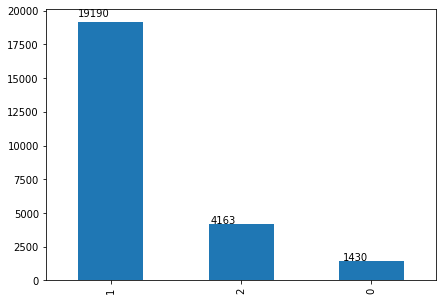

In [ ]:
x = df["class"].value_counts().plot.bar(figsize=(7,5))
for i in x.patches:
    x.annotate(str(i.get_height()), (i.get_x() * 1.02, i.get_height() * 1.02))
print(df["class"].value_counts(normalize=True)*100)

In [ ]:
features = df.columns[1:5]
output = df.columns[5:6]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['count' 'hate_speech' 'offensive_language' 'neither'], 

Labels: 
Index(['class'], dtype='object')


In [ ]:
X = df[features].values
y = df[output].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 74348, Testing size: 24784


In [ ]:
print(df["class"])

0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def get_probabilty_output(X_test, model_fitted, value_count=30):
    def highlight_max(data, color='yellow'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]
        else:
            is_max = data == data.max().max()
            return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
    y_scores = model_fitted.predict_proba(X_test)
    prob_df = pd.DataFrame(y_scores*100).head(value_count)
    styled_df = prob_df.style.background_gradient(cmap='Reds')
    styled_df = styled_df.highlight_max(axis=1, color='green')
    return styled_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
def get_classification_report(y_test,predictions,average="macro"):
    cm = confusion_matrix(np.ravel(y_test), predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")
    
    acc = accuracy_score(np.ravel(y_test), predictions)
    pre = precision_score(np.ravel(y_test), predictions, average=average)
    rec = recall_score(np.ravel(y_test), predictions, average=average)
    print(classification_report(np.ravel(y_test), predictions, digits=3))
    print("Overall Accuracy:", acc)
    print("Overall Precision:", pre)
    print("Overall Recall:", rec)
    return acc,pre,rec

In [ ]:
print(np.ravel(y_test))

[1 1 1 ... 1 1 0]


In [ ]:
parameters_KNN = {
    "n_neighbors" : [5,15],
    "weights" : ('uniform','distance'),
    "algorithm" : ('auto','ball_tree','kd_tree','brute'),
    'p': [2,5]
}

model_KNN = KNN(n_jobs=-1)
model_KNN_with_best_params = GridSearchCV(model_KNN, parameters_KNN)
model_KNN_with_best_params.fit(X_train,np.ravel(y_train))
model_KNN_best_params = model_KNN_with_best_params.best_params_

In [ ]:
model_KNN_best_params

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [ ]:
predictions_KNN = model_KNN_with_best_params.predict(X_test)
print("Predictions:",predictions_KNN[:30])
print("Actual:",np.ravel(y_test[:30]))

Predictions: [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
Actual: [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
get_probabilty_output(X_test=X_test, model_fitted=model_KNN_with_best_params)

,0,1,2
0,0.000000,100.000000,0.000000
1,0.000000,100.000000,0.000000
2,0.000000,100.000000,0.000000
3,100.000000,0.000000,0.000000
4,0.000000,100.000000,0.000000
5,0.000000,100.000000,0.000000
6,0.000000,100.000000,0.000000
7,0.000000,100.000000,0.000000
8,0.000000,100.000000,0.000000
9,0.000000,100.000000,0.000000


              precision    recall  f1-score   support

           0      1.000     1.000     1.000       371
           1      1.000     1.000     1.000      4770
           2      1.000     1.000     1.000      1055

    accuracy                          1.000      6196
   macro avg      1.000     1.000     1.000      6196
weighted avg      1.000     1.000     1.000      6196

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


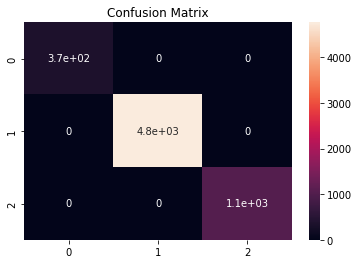

In [ ]:
acc_KNN,pre_KNN,rec_KNN = get_classification_report(y_test,predictions_KNN)

In [1]:
import joblib

In [2]:
pip install aibro


     |████████████████████████████████| 9.9 MB 20.7 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 98 kB 8.1 MB/s 
     |████████████████████████████████| 20.6 MB 1.3 MB/s 
     |████████████████████████████████| 61 kB 9.5 MB/s 
     |████████████████████████████████| 40 kB 6.0 MB/s 
     |████████████████████████████████| 14.8 MB 68.8 MB/s 
     |████████████████████████████████| 283 kB 47.6 MB/s 
     |████████████████████████████████| 225 kB 89.1 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 189 kB 83.9 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 636 kB 65.8 MB/s 
     |████████████████████████████████| 7.2 MB 53.3 MB/s 
     |████████████████████████████████| 335 kB 90.8 MB/s 
     |████████████████████████████████| 61 kB 8.3 MB/s 
     |████████████████████████████████| 51 kB 137 kB/s 
     |███████████████████████